In [1]:
# Homework 10
# Rubi Trujillo
# 05 Agosto 2019

In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd


In [4]:
import datetime as dt
from datetime import datetime

In [5]:
#Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import desc

In [7]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [12]:
# PART 2 - Exploratory Climate Analysis

Text(0, 0.5, 'Precipitation')

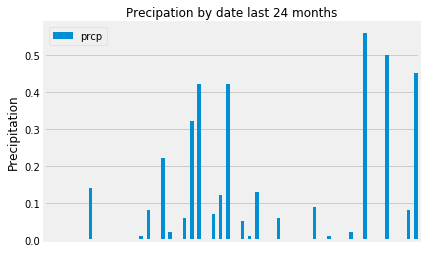

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
##### NOTE: dates are from 2010 to 2017!!!! there is no 2018!!!!!
## so last 12 months since today August 2019 will get NOTHING... that is why is empty!!
## then i will change last 24 instead 12!!!!


# Calculate the date 1 year ago from the last data point in the database

today=(datetime.strptime(str(dt.date.today()), '%Y-%m-%d'))
twelveago=(datetime.strptime(str(dt.date.today() - dt.timedelta(365*2)), '%Y-%m-%d'))
twelveago,today

# Perform a query to retrieve the data and precipitation scores
    #need to order to show
    # sensible how to separate each one
qry1 = session.query(Measurement.date,Measurement.prcp).\
                filter(Measurement.date > twelveago ).\
                order_by(Measurement.date).all( )
qry1
#print(qry1)

# Save the query results as a Pandas DataFrame and set the index to the date column
Q1_DF=pd.DataFrame(qry1)
Q1_DF.set_index(['date'])
Q1_DF
# there are missing values then delete()
Q1_DF.dropna() 

# Sort the dataframe by date  --- already done in query

# Use Pandas Plotting with Matplotlib to plot the data

fig=Q1_DF.plot(kind='bar',x='date',y='prcp')
fig.set_title('Precipation by date last 24 months', fontdict={'fontsize': 12, 'fontweight': 'medium'})

cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(True)
plt.figsize=(20, 20)
plt.legend(loc='upper left')
plt.xlabel ('Daily Date')
plt.ylabel ('Precipitation')
#plt.setp(fig.get_xticklabels(),visible=False)



In [15]:
# use´pandas to calculate the summary statistics for the precipitation data
# 25% of time rain >0.08.. maximun reach 0.56
Q1_DF['prcp'].describe().apply("{0:.3f}".format)

count    45.000
mean      0.085
std       0.153
min       0.000
25%       0.000
50%       0.000
75%       0.080
max       0.560
Name: prcp, dtype: object

In [16]:
# Design a query to show how many stations are available in this dataset?
qry2 = session.query(Measurement.station).\
                group_by(Measurement.station).count( )

qry3 = session.query(Measurement.station).\
                group_by(Measurement.station).all( )
print('There are '+ str(qry2) + ' stations :' + str(qry3))


There are 9 stations :[('USC00511918',), ('USC00513117',), ('USC00514830',), ('USC00516128',), ('USC00517948',), ('USC00518838',), ('USC00519281',), ('USC00519397',), ('USC00519523',)]


In [17]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
qry4 = session.query(Measurement.station,func.count()).\
                group_by(Measurement.station).\
                order_by(desc(func.count())).all()
qry4


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

qry5 = session.query(Measurement.station,func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
                group_by(Measurement.station).\
               order_by(desc(func.count())).all()
qry5


[('USC00519281', 54.0, 85.0, 71.66378066378067),
 ('USC00519397', 56.0, 87.0, 74.55323054331865),
 ('USC00513117', 59.0, 85.0, 72.68918420081211),
 ('USC00519523', 56.0, 85.0, 74.5436493068565),
 ('USC00516128', 58.0, 84.0, 70.91500765696784),
 ('USC00514830', 58.0, 85.0, 74.8732970027248),
 ('USC00511918', 53.0, 87.0, 71.61596766043456),
 ('USC00517948', 58.0, 87.0, 74.68440233236151),
 ('USC00518838', 58.0, 83.0, 72.72407045009784)]

('2017-08-18',)


Text(0.5, 1.0, 'Temperature by date last 12 months- Station USC00519281')

<Figure size 1224x720 with 0 Axes>

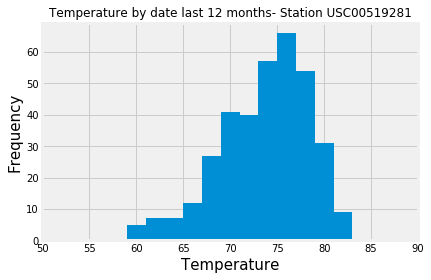

In [19]:
# Choose the station with the highest number of temperature observations.
ses_maxobs = session.query(Measurement.station).\
                group_by(Measurement.station).\
                order_by(desc(func.count())).first()
ses_maxobs
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
    #read last observation date and from that date get last 12 months
last_tobs = session.query(Measurement.date).\
                 filter(Measurement.station == 'USC00519281').\
                 order_by(Measurement.date.desc()).first()
print(last_tobs )
        # result last_tobs = ('2017-08-18',)  
        #converting result to date
       # fecha = pd.to_datetime(last_tobs).strftime( '%Y-%m-%d')
       # fecha = pd.to_datetime(last_tobs)
       # fecha
       # mth12_lst=(datetime.strptime(str(fecha - dt.timedelta(365)), '%Y-%m-%d'))


qry6 = session.query(Measurement.date,Measurement.tobs).\
                    filter( Measurement.date > '2016-08-18').\
                    filter( Measurement.station == 'USC00519281').\
                    order_by(Measurement.date).all( )

qry6

# Save the query results as a Pandas DataFrame and set the index to the date column
Q6_DF=pd.DataFrame(qry6)
Q6_DF.set_index(['date'])
Q6_DF
Q6_DF.dropna() 

# prueba 2
fig=plt.figure(figsize=(17,10))
Q6_DF.hist(column="tobs",bins=12)
plt.xlabel('Temperature',fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.xlim([50,90])
plt.title('Temperature by date last 12 months- Station USC00519281', fontdict={'fontsize': 12, 'fontweight': 'medium'})

In [21]:
####  Step 2 - Climate App
# design a Flask API based on the queries that you have just developed.
# see hawaii_api.py
